### 데이터 전처리하기: 3. SVM 모델에서
전처리 과정은 w2_titanicDT.ipynb에 정리되어 있음!

코드에 익숙해지도록 주석은 거의 뺌. 원본 주석도 위 파일에 있음!

In [1]:
# 1. 결측치 확인
import pandas as pd

df = pd.read_csv("../titanic.csv")

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [2]:
# 2. 결측치 제거

df.drop(columns=['Cabin'], inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Age'].fillna(df['Age'].mean(), inplace=True)

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\jt341\AppData\Local\Temp\ipykernel_13604\788689256.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
C:\Users\jt341\AppData\Local\Temp\ipykernel_13604\788689256.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Survived
0    549
1    342
Name: count, dtype: int64


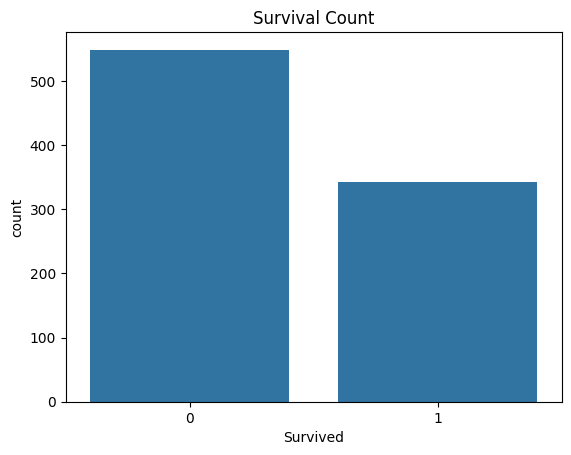

In [3]:
# 3. 레이블 불균형(imbalanced data) 확인

print(df['Survived'].value_counts())

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Survived'])
plt.title("Survival Count")
plt.show()

In [13]:
# 4. 노이즈 제거: 불필요한 컬럼(속성) 제거

df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

print(df_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [14]:
# 5. 인코딩(숫자가 아닌 데이터를 숫자로 변환)

# **인코딩 전: 열의 각 값의 개수 확인
print(df_cleaned['Sex'].value_counts())
print(df_cleaned['Embarked'].value_counts())
print("----[위: 변환 전, 아래: 변환 후]----")


# **인코딩: Label Encoding 방법 사용
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cleaned['Sex'] = encoder.fit_transform(df_cleaned['Sex'])
df_cleaned['Embarked'] = encoder.fit_transform(df_cleaned['Embarked'])

print(df_cleaned['Sex'].value_counts())
print(df_cleaned['Embarked'].value_counts())
print(df_cleaned.head())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
----[위: 변환 전, 아래: 변환 후]----
Sex
1    577
0    314
Name: count, dtype: int64
Embarked
2    646
0    168
1     77
Name: count, dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [6]:
# 외전. 레이블 불균형 해결하기(균형 맞추기)

from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print(y_smote.value_counts())

Survived
0    549
1    549
Name: count, dtype: int64


In [11]:
# 6. 만든 데이터로 SVM 모델 학습
# 자세한 주석은 w1_irisSVM.ipynb에서

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 데이터 제작
X = X_smote
y = y_smote

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성, 학습
svm_model = SVC(kernel="rbf", C=10, random_state=42)
    # C: 마진. C가 작을수록 마진이 커지고, 마진이 클수록 훈련 데이터에 맞아져 과적합 가능성 증가
    # kernel="linear": 커널 종류가 선형. 자료들을 나누는 구분선 형태를 선형/비선형(곡선 등) 등에서 하나를 선택하는 것. rbf, poly, sigmoid 등 다양함.

svm_model.fit(X_train, y_train)

# 모델 예측, 정확도 체크
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 테스트 정확도: {accuracy:.2f}")  # 0~1 사이의 정확도 출력

cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f"SVM 교차 검증 정확도 평균: {cross_val_scores.mean():.2f}")



SVM 테스트 정확도: 0.84
SVM 교차 검증 정확도 평균: 0.81


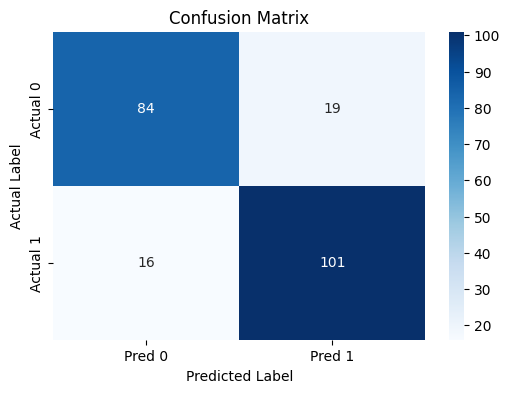

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       103
           1       0.84      0.86      0.85       117

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



In [15]:
# 7. Confusion Matrix 만들기

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측값과 실제값 비교
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 정밀도, 재현율, F1-score 출력
print(classification_report(y_test, y_pred))